In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Aufgabe 31 Regularisierte kleinste Quadrate

# a) kleinste Quadrate ohne Regularisierung

$f(x) = a_0 x^0 + a_1 x^1 + a_2 x^2 + a_3 x^3 + a_4 x^4 + a_5 x^5 + a_6 x^6$  
$f_i(x) = x^i$  
Designmatrix:  $A = 
\begin{pmatrix}
    f_1(x_1) & f_2(x_1) & ... \\
    f_1(x_2) & f_2(x_2) & ... \\
    ... & ... & ...
\end{pmatrix}$ Dimemsion: (#Werte x #Funktionen) $= (n \times p)$  
$\Rightarrow \hat{\vec{a}} = (A^T A)^{-1} A^T \vec{y}$ 

### Unsicherheit / Varianz bei unbekannten Unsicherheiten der Messdaten:  
Varianz der Messdaten:  
$\hat{Var}(y_i) = \frac{\hat{S}}{n-p}$  
mit $\hat{S} = \vec{y}^T \vec{y} - \hat{\vec{a}}^T A^T \vec{y}$  
Varianz der geschätzten Parameter:  
$\Rightarrow \hat{Var}(\hat{\vec{a}}) = \hat{Var}(y_i) (A^T A)^{-1}$

In [2]:
# Daten einlesen
x, y = np.genfromtxt('aufg_a.csv', skip_header=1, delimiter=',', unpack=True)
print(f'{x.shape = }')
print(f'{y.shape = }')

x.shape = (8,)
y.shape = (8,)


In [39]:
# Designmatrix aufstellen
A = np.column_stack([x**i for i in range(7)])
n = A.shape[0]
p = A.shape[1]
print(f'{A.shape = }')

A.shape = (8, 7)


In [4]:
with np.printoptions(precision=3):
    print(f'A = \n{A}')

A = 
[[1.000e+00 5.000e-01 2.500e-01 1.250e-01 6.250e-02 3.125e-02 1.562e-02]
 [1.000e+00 1.500e+00 2.250e+00 3.375e+00 5.062e+00 7.594e+00 1.139e+01]
 [1.000e+00 2.500e+00 6.250e+00 1.562e+01 3.906e+01 9.766e+01 2.441e+02]
 [1.000e+00 3.500e+00 1.225e+01 4.288e+01 1.501e+02 5.252e+02 1.838e+03]
 [1.000e+00 4.500e+00 2.025e+01 9.112e+01 4.101e+02 1.845e+03 8.304e+03]
 [1.000e+00 5.500e+00 3.025e+01 1.664e+02 9.151e+02 5.033e+03 2.768e+04]
 [1.000e+00 6.500e+00 4.225e+01 2.746e+02 1.785e+03 1.160e+04 7.542e+04]
 [1.000e+00 7.500e+00 5.625e+01 4.219e+02 3.164e+03 2.373e+04 1.780e+05]]


In [6]:
# Fit durchführen / Parameter bestimmen
a = np.linalg.inv(A.T @ A) @ A.T @ y
with np.printoptions(precision=4):
    print(f'a = \n{a}')

a = 
[-6.7445e-02  6.0961e-01 -5.1375e-01  2.1057e-01 -4.5201e-02  4.7857e-03
 -1.9629e-04]


In [40]:
# Fit Unsicherheit:
# dafür Summe der Abstandsquadrate:
S = y.T @ y - a.T @ A.T @ y
# Varianz der Messdaten:
Var_y = S/(n - p) 
y_err = np.sqrt(Var_y)
# Varianz der Parameter:
Var_a = Var_y * np.linalg.inv(A.T @ A)
a_err = np.sqrt(np.diag(Var_a))

print(f'Var_y = {Var_y:.5f}') 
with np.printoptions(precision=4):
    print(f'Var_a =\n {Var_a}')
    print(f'a_err =\n {a_err}')

Var_y = 0.00048
Var_a =
 [[ 3.0139e-02 -9.5213e-02  9.3428e-02 -4.0834e-02  8.8523e-03 -9.3138e-04
   3.7917e-05]
 [-9.5213e-02  3.0928e-01 -3.0791e-01  1.3581e-01 -2.9626e-02  3.1313e-03
  -1.2792e-04]
 [ 9.3428e-02 -3.0791e-01  3.1042e-01 -1.3825e-01  3.0383e-02 -3.2300e-03
   1.3256e-04]
 [-4.0834e-02  1.3581e-01 -1.3825e-01  6.2081e-02 -1.3737e-02  1.4684e-03
  -6.0536e-05]
 [ 8.8523e-03 -2.9626e-02  3.0383e-02 -1.3737e-02  3.0574e-03 -3.2842e-04
   1.3594e-05]
 [-9.3138e-04  3.1313e-03 -3.2300e-03  1.4684e-03 -3.2842e-04  3.5426e-05
  -1.4716e-06]
 [ 3.7917e-05 -1.2792e-04  1.3256e-04 -6.0536e-05  1.3594e-05 -1.4716e-06
   6.1317e-08]]
a_err =
 [1.7361e-01 5.5613e-01 5.5715e-01 2.4916e-01 5.5294e-02 5.9520e-03
 2.4762e-04]


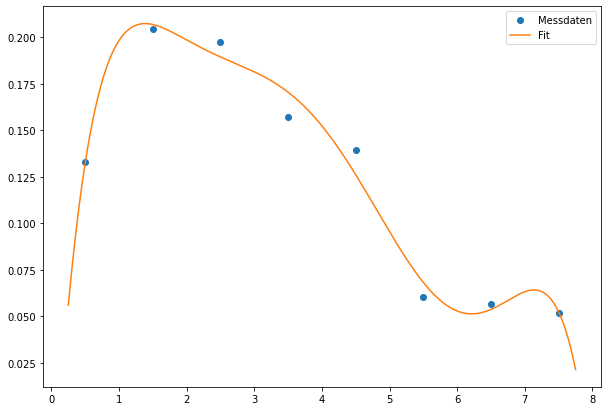

In [106]:
x_lin = np.linspace(np.min(x)-0.25, np.max(x)+0.25, 1000)
y_fit = np.sum([a[i]*x_lin**i for i in range(7)], axis=0)

plt.figure(figsize=(10,7))
plt.plot(x, y, 'o', label='Messdaten')
plt.plot(x_lin, y_fit, '-', label='Fit')
plt.legend()
plt.show()

## b) kleinste Quadrate mit Regularisierung
mit Tikhonov Regularisierung  
$\hat{\vec{a}} = (A^T A + \Gamma^T \Gamma)^{-1} A^T \vec{y}$  
hier: $\Gamma = \sqrt{\lambda} C A$  
wobei $C = \begin{pmatrix}
    -1 & 1 & 0 & ... & ... \\
    1 & -2 & 1 & 0 & ... \\
    0 & 1 & -2 & 1 & ... \\
    & ... \\
    & ... & & 1 & -2 & 1 \\
    & ... & & & 1 & -1
\end{pmatrix}$ ist $(n \times n)$  
und wähle $\lambda \in \{0.1, 0.3, 0.7, 3, 10\}$

In [64]:
# Regularisierungshilfsmatrix aufstellen
C_diag0 = [-1] + [-2]*(n-2) + [-1]
C_diag1 = [1]*(n-1)
print(f'C_diag0 = {C_diag0}')
print(f'C_diag1 = {C_diag1}')

C_diag0 = [-1, -2, -2, -2, -2, -2, -2, -1]
C_diag1 = [1, 1, 1, 1, 1, 1, 1]


In [68]:
C = np.diag(C_diag0, k=0)
C = C + np.diag(C_diag1, k=1)
C = C + np.diag(C_diag1, k=-1)
print(f'{C.shape = }')
print(f'C = \n{C}')

C.shape = (8, 8)
C = 
[[-1  1  0  0  0  0  0  0]
 [ 1 -2  1  0  0  0  0  0]
 [ 0  1 -2  1  0  0  0  0]
 [ 0  0  1 -2  1  0  0  0]
 [ 0  0  0  1 -2  1  0  0]
 [ 0  0  0  0  1 -2  1  0]
 [ 0  0  0  0  0  1 -2  1]
 [ 0  0  0  0  0  0  1 -1]]


In [107]:
# Regularisierungsstärken
lambdas = [0, 0.1, 0.3, 0.7, 3, 10]

In [108]:
# Regularisierungsmatrizen:
Gammas = [np.sqrt(lambda_) * C @ A for lambda_ in lambdas]

with np.printoptions(precision=2):
    for Gamma,lambda_ in zip(Gammas,lambdas):
        print(f'lambda = {lambda_}')
        print(f'Gamma =\n{Gamma} \n')

lambda = 0
Gamma =
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]] 

lambda = 0.1
Gamma =
[[ 0.00e+00  3.16e-01  6.32e-01  1.03e+00  1.58e+00  2.39e+00  3.60e+00]
 [ 0.00e+00  1.11e-16  6.32e-01  2.85e+00  9.17e+00  2.61e+01  7.00e+01]
 [ 0.00e+00 -2.22e-16  6.32e-01  4.74e+00  2.43e+01  1.07e+02  4.31e+02]
 [ 0.00e+00  2.22e-16  6.32e-01  6.64e+00  4.71e+01  2.82e+02  1.54e+03]
 [ 0.00e+00  0.00e+00  6.32e-01  8.54e+00  7.75e+01  5.91e+02  4.08e+03]
 [ 0.00e+00  0.00e+00  6.32e-01  1.04e+01  1.15e+02  1.07e+03  8.97e+03]
 [ 0.00e+00  0.00e+00  6.32e-01  1.23e+01  1.61e+02  1.76e+03  1.73e+04]
 [ 0.00e+00 -3.16e-01 -4.43e+00 -4.66e+01 -4.36e+02 -3.84e+03 -3.24e+04]] 

lambda = 0.3
Gamma =
[[ 0.00e+00  5.48e-01  1.10e+00  1.78e+00  2.74e+00  4.14e+00  6.23e+00]
 [ 0.00e+00  0.00e+00  1.10e+00  4.93e+00  1.59e+01  4.52e+01  1.21e+02]
 [ 0.00e+00

In [109]:
# Parameter bestimmen
a_regs = [np.linalg.inv(A.T @ A + Gamma.T @ Gamma) @ A.T @ y for Gamma in Gammas]

with np.printoptions(precision=2):
    for a_reg,lambda_ in zip(a_regs,lambdas):
        print(f'lambda = {lambda_}')
        print(f'a_reg ={a_reg} \n')

lambda = 0
a_reg =[-6.74e-02  6.10e-01 -5.14e-01  2.11e-01 -4.52e-02  4.79e-03 -1.96e-04] 

lambda = 0.1
a_reg =[ 5.28e-02  2.60e-01 -1.93e-01  7.70e-02 -1.72e-02  1.90e-03 -8.10e-05] 

lambda = 0.3
a_reg =[ 1.11e-01  1.08e-01 -6.43e-02  2.49e-02 -6.34e-03  7.89e-04 -3.63e-05] 

lambda = 0.7
a_reg =[ 1.42e-01  4.37e-02 -1.72e-02  6.46e-03 -2.36e-03  3.59e-04 -1.81e-05] 

lambda = 3
a_reg =[ 1.70e-01  7.97e-03 -1.06e-03 -1.07e-04 -4.92e-04  1.08e-04 -6.00e-06] 

lambda = 10
a_reg =[ 1.74e-01  2.10e-03 -2.10e-03 -1.88e-04 -1.44e-04  3.94e-05 -2.29e-06] 



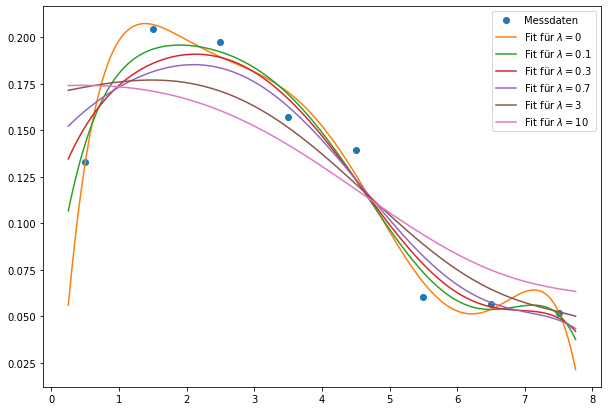

In [110]:
# Plotten:
plt.figure(figsize=(10,7))
plt.plot(x, y, 'o', label='Messdaten')
for lambda_, a_reg in zip(lambdas,a_regs):
    y_fit = np.sum([a_reg[i]*x_lin**i for i in range(7)], axis=0)
    plt.plot(x_lin, y_fit, '-', label=f'Fit für $\lambda = {lambda_}$')
plt.legend()
plt.show()

## c) gewichtete kleinste Quadrate  

Gewichtsmatrix (ohne Korrelation):  
$W(\vec{y}) = Var^{-1}(\vec{y}) = \begin{pmatrix}
    1/\sigma_1^2 & 0 & ... \\
    0 & 1/\sigma_2^2 & ...  \\
    ... & ... & ... \\
\end{pmatrix}$  
Lösung:  
$\hat{\vec{a}} = (A^T W A)^{-1} A^T W \vec{y}$  
$Var(\hat{\vec{a}}) = (A^T W A)^{-1}$

In [135]:
# Daten einlesen
df = pd.read_csv('aufg_c.csv')
# Dataframe zu Numpy Arrays
x = df['x'].to_numpy()
y = df.drop('x',axis=1).to_numpy()
print(f'{x.shape = }')
print(f'{y.shape = }')

x.shape = (8,)
y.shape = (8, 50)


In [136]:
# Mittelwerte und Standardabweichungen der Mittelwerte
import scipy.stats
y_mean = np.mean(y, axis=1)
y_sem = scipy.stats.sem(y, axis=1)
print(f'{y_mean.shape = }')
print(f'{y_sem.shape = }')

y_mean.shape = (8,)
y_sem.shape = (8,)


In [141]:
# Gewichtsmatrix aufstellen:
W = np.diag(1/y_sem**2)
print(f'{W.shape = }')

W.shape = (8, 8)


In [137]:
# Designmatrix aufstellen
A = np.column_stack([x**i for i in range(7)])
n = A.shape[0]
p = A.shape[1]
print(f'{A.shape = }')

A.shape = (8, 7)


In [143]:
# Fit durchführen / Parameter bestimmen
a = np.linalg.inv(A.T @ W @ A) @ A.T @ W @ y_mean
with np.printoptions(precision=4):
    print(f'a = \n{a}')

a = 
[ 1.0398e-01  1.9296e-02  6.1700e-02 -3.7565e-02  7.9188e-03 -7.3489e-04
  2.5696e-05]


In [147]:
# Kovarianzmatrix berechnen:
Var_a = np.linalg.inv(A.T @ W @ A)
with np.printoptions(precision=1):
    print(f'Var_a = \n{Var_a}')

Var_a = 
[[ 8.8e-04 -2.8e-03  2.7e-03 -1.1e-03  2.4e-04 -2.5e-05  9.9e-07]
 [-2.8e-03  9.0e-03 -8.7e-03  3.8e-03 -8.0e-04  8.3e-05 -3.3e-06]
 [ 2.7e-03 -8.7e-03  8.6e-03 -3.8e-03  8.1e-04 -8.4e-05  3.4e-06]
 [-1.1e-03  3.8e-03 -3.8e-03  1.6e-03 -3.6e-04  3.7e-05 -1.5e-06]
 [ 2.4e-04 -8.0e-04  8.1e-04 -3.6e-04  7.7e-05 -8.1e-06  3.3e-07]
 [-2.5e-05  8.3e-05 -8.4e-05  3.7e-05 -8.1e-06  8.6e-07 -3.5e-08]
 [ 9.9e-07 -3.3e-06  3.4e-06 -1.5e-06  3.3e-07 -3.5e-08  1.4e-09]]


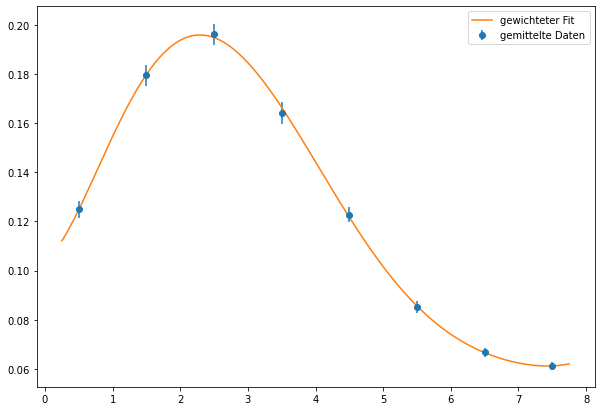

In [148]:
x_lin = np.linspace(np.min(x)-0.25, np.max(x)+0.25, 1000)
y_fit = np.sum([a[i]*x_lin**i for i in range(7)], axis=0)

plt.figure(figsize=(10,7))
plt.errorbar(x, y_mean, y_sem, fmt='o', label='gemittelte Daten')
plt.plot(x_lin, y_fit, '-', label='gewichteter Fit')
plt.legend()
plt.show()